In [1]:
from fastbook import *

In [2]:
urls = search_images_ddg('bird photos', max_images=1)
urls[0]

'http://1.bp.blogspot.com/--HmOfzrdaus/UGvV-htTjoI/AAAAAAAACgE/t-x_kb2HdI0/s1600/birds-03.jpg'

In [3]:
from fastdownload import download_url
dest = 'bird.jpeg'
download_url(urls[0], dest, show_progress=False)

Path('bird.jpeg')

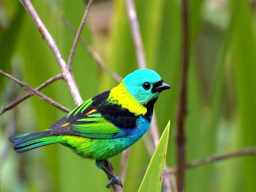

In [4]:
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

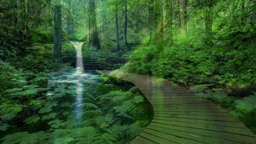

In [5]:
download_url(search_images_ddg('forest photos', max_images=1)[0], 'forest.jpeg', show_progress=False)
Image.open('forest.jpeg').to_thumb(256,256)

In [6]:
searches = 'bird', 'forest'
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images_ddg(f'{o} photo'))
    sleep(10)
    download_images(dest, urls=search_images_ddg(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images_ddg(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

In [7]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

36

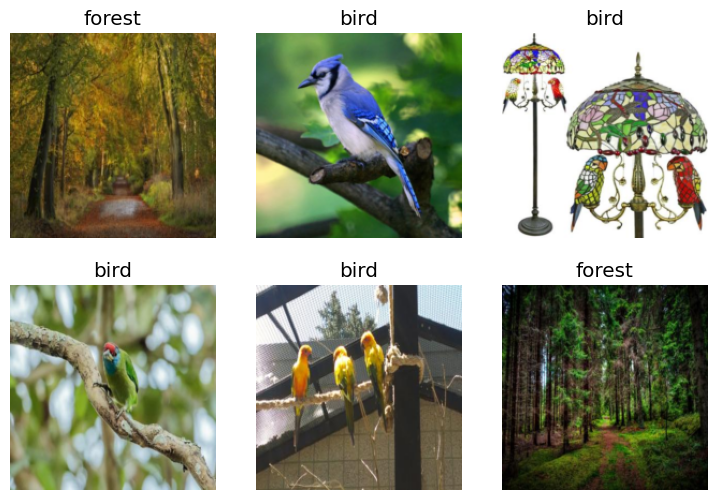

In [8]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.438542,0.249270,0.054455,00:51


epoch,train_loss,valid_loss,error_rate,time
0,0.176781,0.219558,0.059406,01:13
1,0.089202,0.191743,0.049505,01:17
2,0.063717,0.212796,0.049505,01:26


In [10]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpeg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.9999
